In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel("SINTER_RCM_DATA.xlsx", nrows = 10000)
df.head()

,UPD_TIME,CF2_MNDE_V_VBT,CF2_MNDE_H_VBT,CF2_MOTOR_NDE_AXIAL_VIB,CF2_MDE_V_VBT,CF2_MDE_H_VBT,CF2_MOTOR_DE_AXIAL_VIB,CF2_FNDE_V_VBT,CF2_FNDE_H_VBT,CF2_FAN_NDE_AXIAL_VIB,...,VFDCOOLWATEROUTTEMP,VFDCOOLWATERINPRESS,VFDCOOLWATEROUTPRESS,VFDCOOLWATERINFLOW,VFDOUTFLOW,MTRCOOLWATERINTEMP,MTRCOOLWATEROUTTEMP,MTRCOOLWATERINPRESS,MTRCOOLWATEROUTPRESS,MTRCOOLWATEROUTFLOW
0,2024-03-19 14:13:22,0.44,0.51,1.00,0.88,1.68,1.26,1.12,1.70,0.76,...,31.69,4.98,0.95,19.41,19.99,33.87,35.77,1.84,3.71,29.84
1,2024-03-19 14:13:48,0.44,0.50,1.00,0.89,1.68,1.28,1.11,1.67,0.77,...,31.68,4.96,0.96,19.47,20.26,33.89,35.78,1.84,3.71,29.81
2,2024-03-19 14:14:14,0.44,0.53,0.97,0.87,1.66,1.24,1.12,1.71,0.72,...,31.68,4.97,0.96,19.41,20.00,33.89,35.79,1.84,3.70,29.79
3,2024-03-19 14:14:40,0.44,0.48,1.05,0.88,1.67,1.23,1.12,1.67,0.74,...,31.69,4.96,0.97,19.42,19.40,33.89,35.79,1.84,3.69,29.79
4,2024-03-19 14:15:06,0.45,0.54,1.01,0.88,1.66,1.27,1.11,1.69,0.73,...,31.72,4.96,0.95,19.40,19.81,33.89,35.79,1.84,3.70,29.83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   UPD_TIME                    10000 non-null  datetime64[ns]
 1   CF2_MNDE_V_VBT              10000 non-null  float64       
 2   CF2_MNDE_H_VBT              10000 non-null  float64       
 3   CF2_MOTOR_NDE_AXIAL_VIB     10000 non-null  float64       
 4   CF2_MDE_V_VBT               10000 non-null  float64       
 5   CF2_MDE_H_VBT               10000 non-null  float64       
 6   CF2_MOTOR_DE_AXIAL_VIB      10000 non-null  float64       
 7   CF2_FNDE_V_VBT              10000 non-null  float64       
 8   CF2_FNDE_H_VBT              10000 non-null  float64       
 9   CF2_FAN_NDE_AXIAL_VIB       10000 non-null  float64       
 10  CF2_FDE_V_VBT               10000 non-null  float64       
 11  CF2_FDE_H_VBT               10000 non-null  float64    

In [6]:
df.isnull().sum()

UPD_TIME                        0
CF2_MNDE_V_VBT                  0
CF2_MNDE_H_VBT                  0
CF2_MOTOR_NDE_AXIAL_VIB         0
CF2_MDE_V_VBT                   0
CF2_MDE_H_VBT                   0
CF2_MOTOR_DE_AXIAL_VIB          0
CF2_FNDE_V_VBT                  0
CF2_FNDE_H_VBT                  0
CF2_FAN_NDE_AXIAL_VIB           0
CF2_FDE_V_VBT                   0
CF2_FDE_H_VBT                   0
CF2_FAN_DE_AXIAL_VIB            0
CF2_WNIDING_TEMP1               0
CF2_WNIDING_TEMP2               0
CF2_WNIDING_TEMP3               0
CF2_MOTOR_DEBEARING_TEMP        0
CF2_MOTOR_NDE_BEARING_TEMP      0
CF2_FAN_DE_BEARING_TEMP         0
CF2_FAN_NDE_BEARING_TEMP        0
CF2_MOTOR_NDE_OIL_PR            0
CF2_MOTOR_DE_OIL_PR             0
CF2_FAN_NDE_OIL_PR              0
CF2_FAN_DE_OIL_PR               0
CF2_FAN_OIL_PUMP_PR             0
CF2_MOTOR_OIL_PUMP_PR           0
CF2_COOL_WATER_MAIN_PR        175
ID_FAN_01_RUN                   0
CF2_VFD_CURRENT                 0
CF2_VFD_SPEED 

<Axes: >

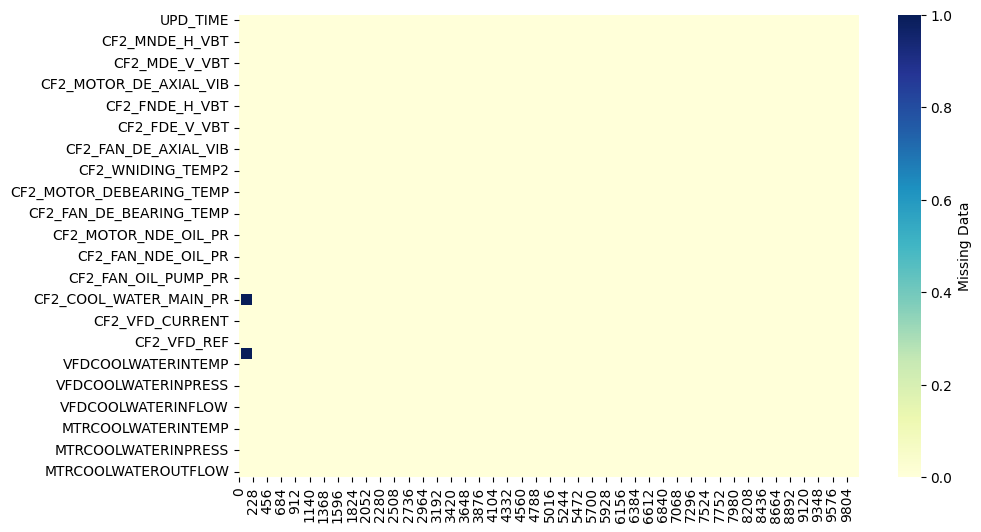

In [7]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<Figure size 1000x600 with 0 Axes>

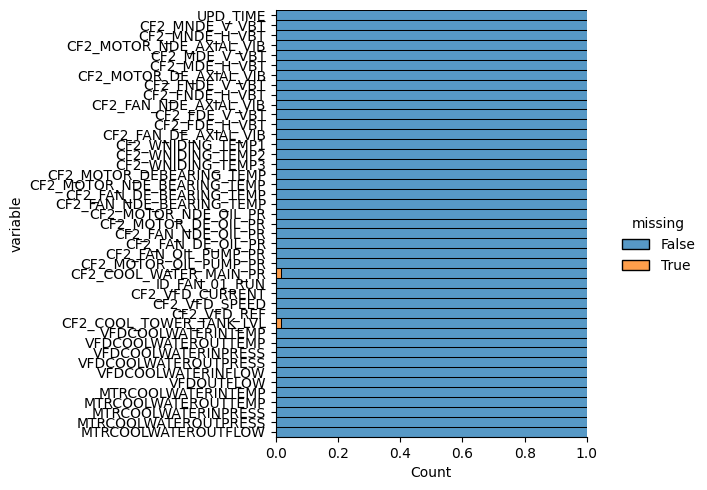

In [8]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [9]:
vibration_cols = []
for i in df.columns:
    if "VIB" in i or "VBT" in i:
        vibration_cols.append(i)

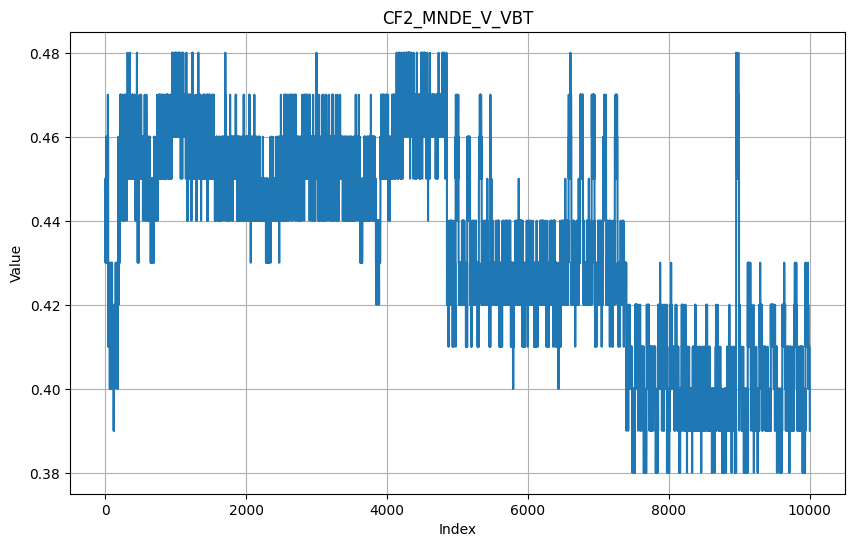

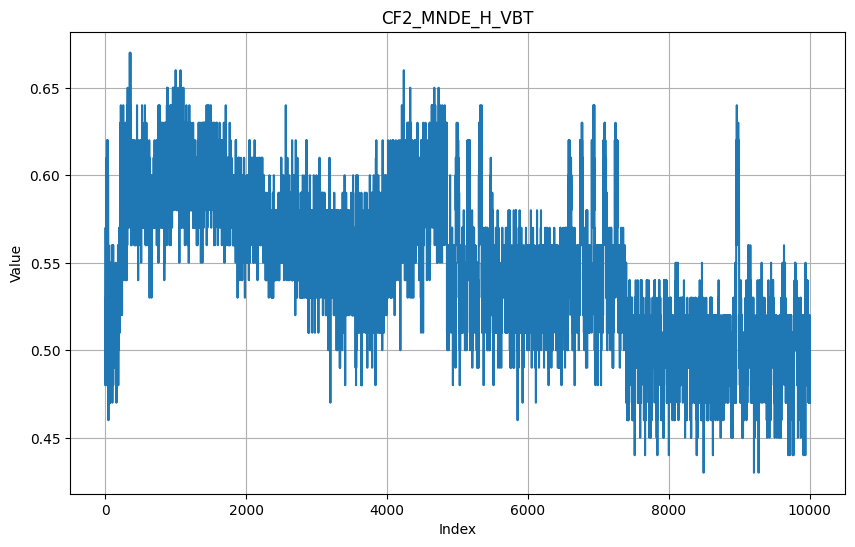

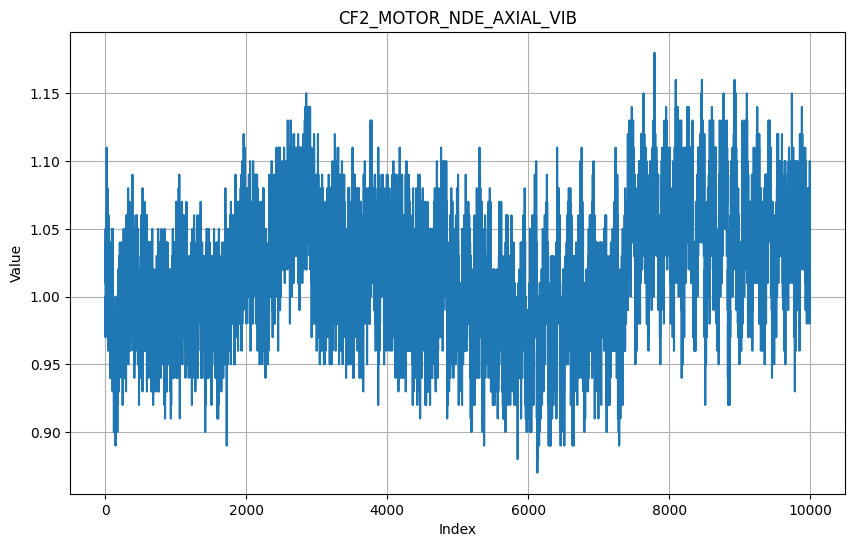

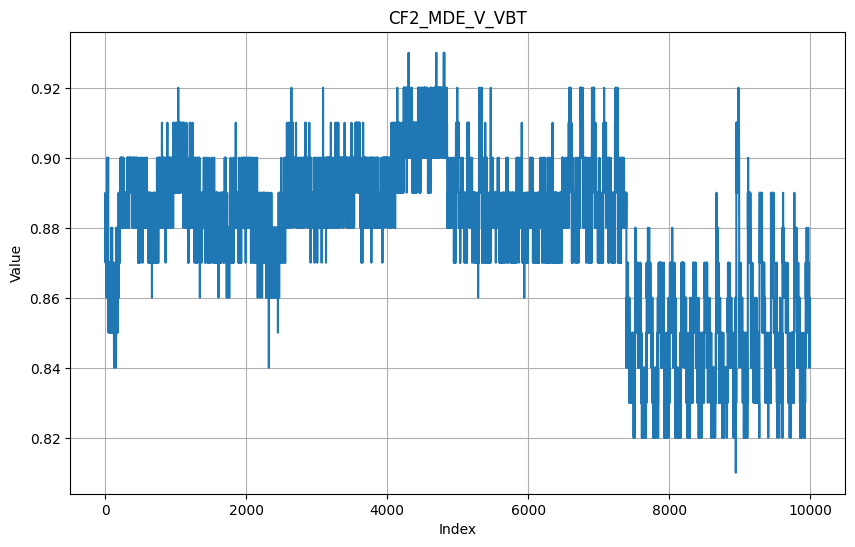

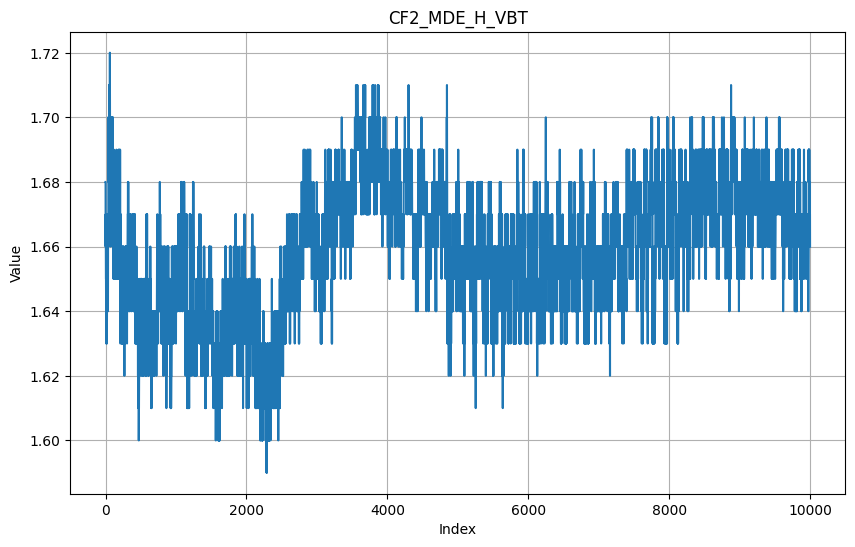

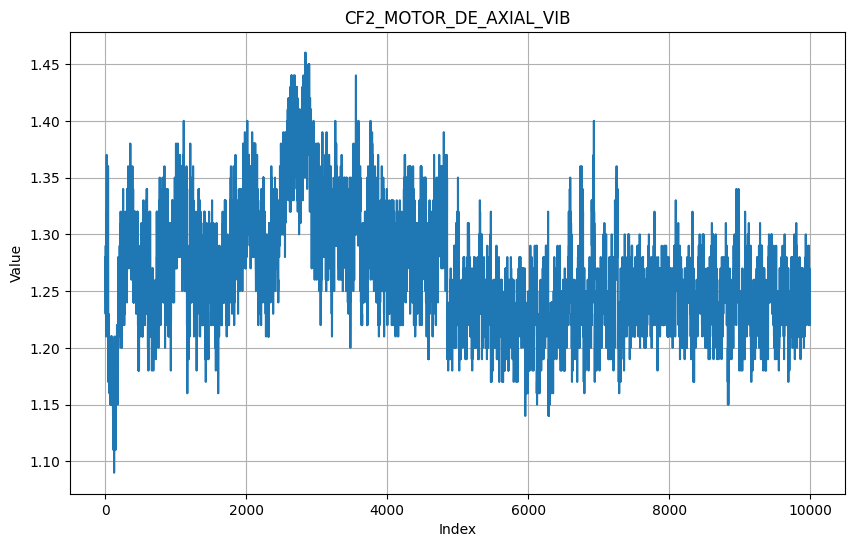

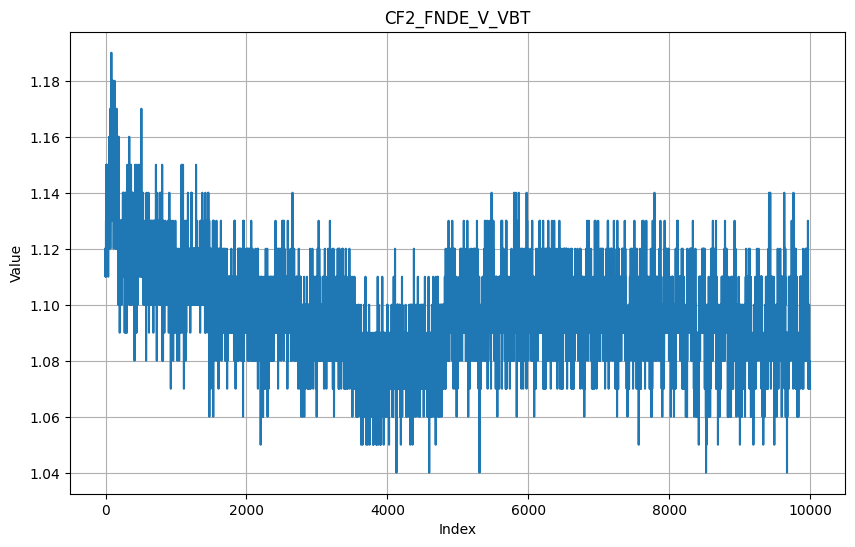

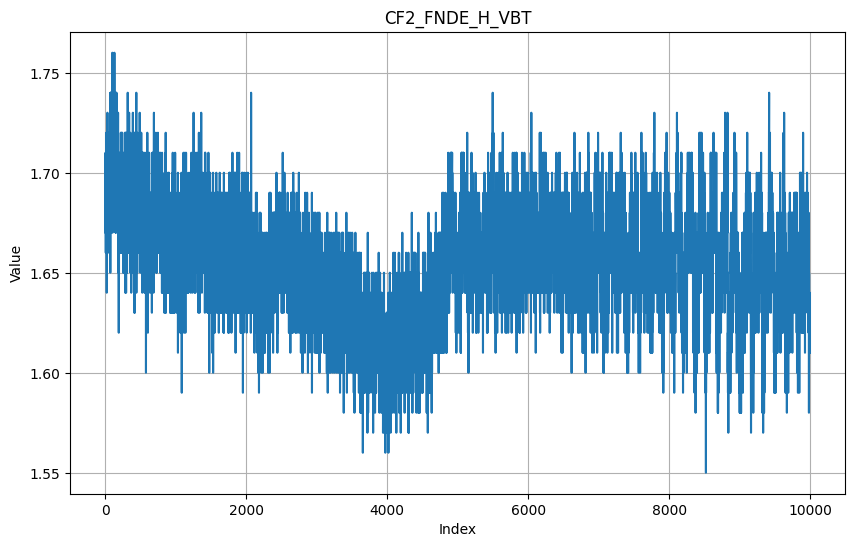

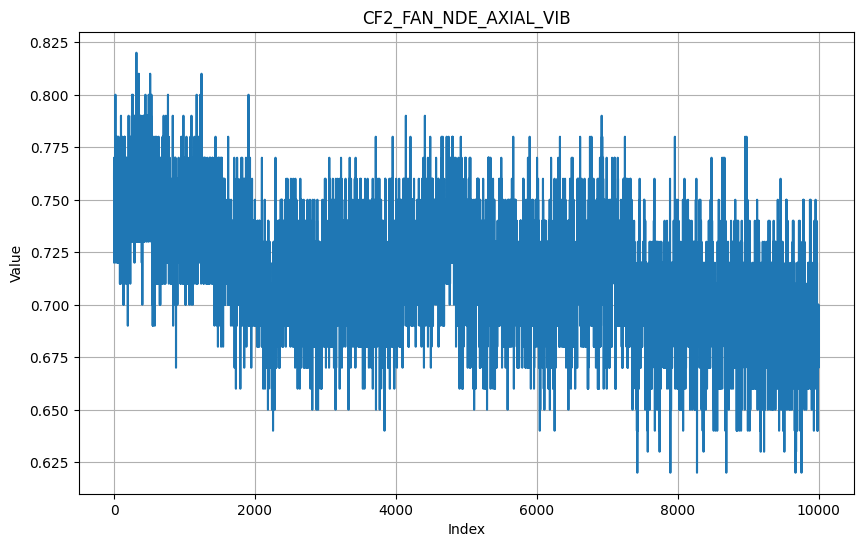

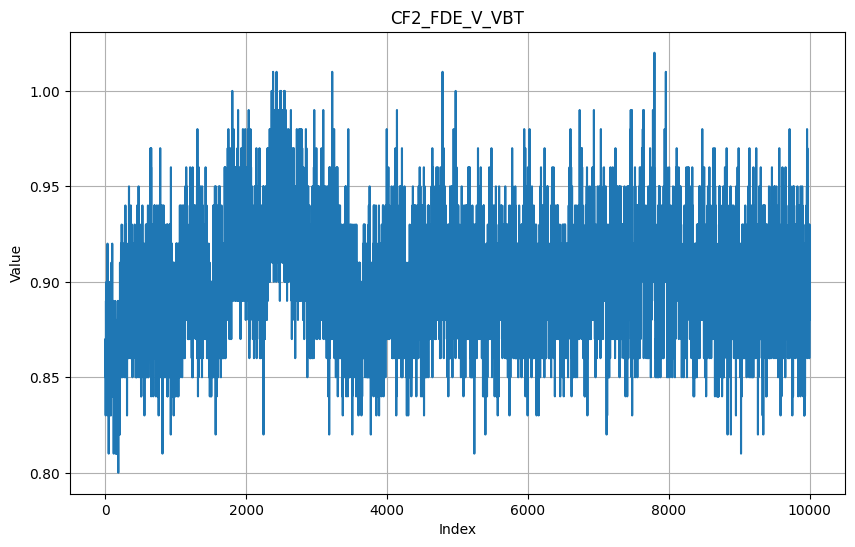

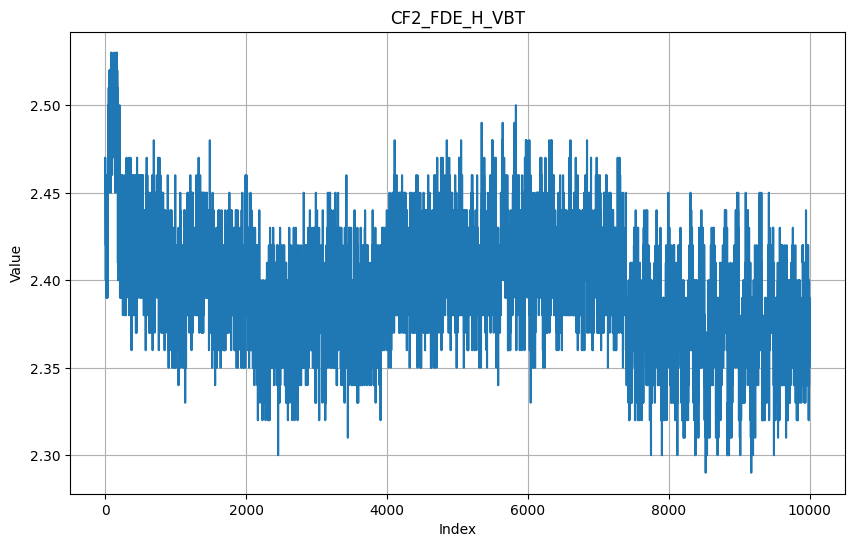

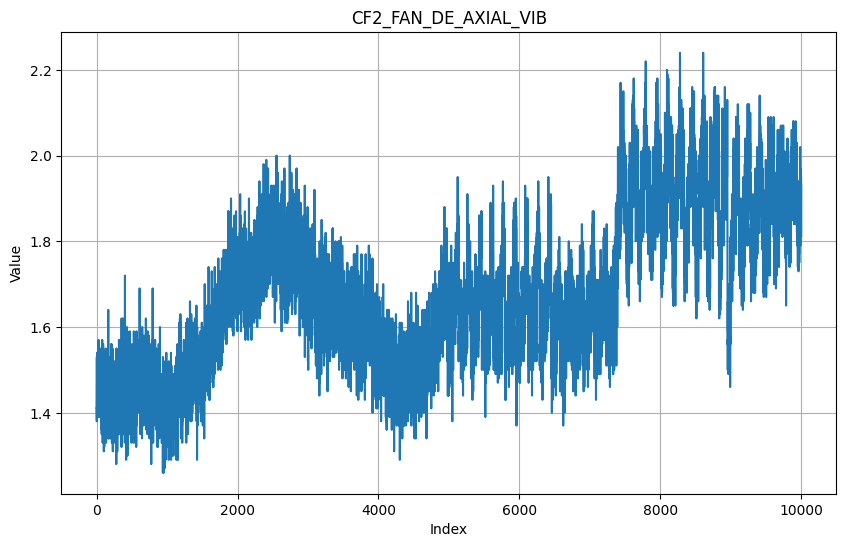

In [10]:
for col in vibration_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(df[col])
    plt.title(col)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [11]:
df["UPD_TIME"][:10000]

0      2024-03-19 14:13:22
1      2024-03-19 14:13:48
2      2024-03-19 14:14:14
3      2024-03-19 14:14:40
4      2024-03-19 14:15:06
               ...        
9995   2024-03-20 01:54:48
9996   2024-03-20 01:54:53
9997   2024-03-20 01:54:58
9998   2024-03-20 01:55:03
9999   2024-03-20 01:55:08
Name: UPD_TIME, Length: 10000, dtype: datetime64[ns]

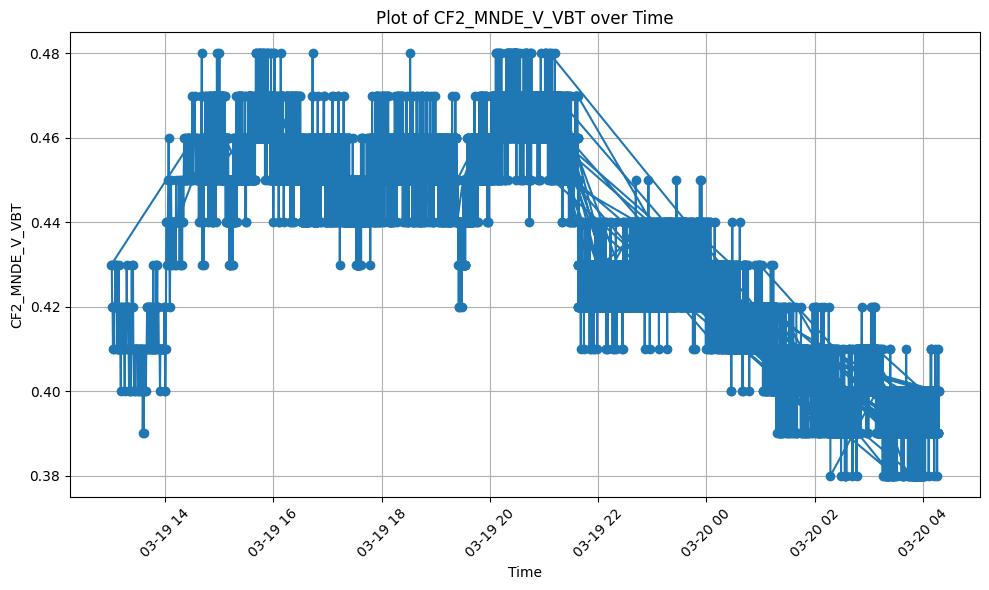

In [14]:
df['UPD_TIME'] = pd.to_datetime(df['UPD_TIME'])

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(df['UPD_TIME'], df['CF2_MNDE_V_VBT'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('CF2_MNDE_V_VBT')
plt.title('Plot of CF2_MNDE_V_VBT over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [15]:
df["UPD_TIME"]


0      2024-03-19 14:13:22
1      2024-03-19 14:13:48
2      2024-03-19 14:14:14
3      2024-03-19 14:14:40
4      2024-03-19 14:15:06
               ...        
9995   2024-03-20 01:54:48
9996   2024-03-20 01:54:53
9997   2024-03-20 01:54:58
9998   2024-03-20 01:55:03
9999   2024-03-20 01:55:08
Name: UPD_TIME, Length: 10000, dtype: datetime64[ns]

In [24]:
df1 = pd.read_excel("SINTER_RCM_DATA.xlsx")

In [25]:
new_df = df1[['UPD_TIME', 'CF2_MNDE_V_VBT']].copy()

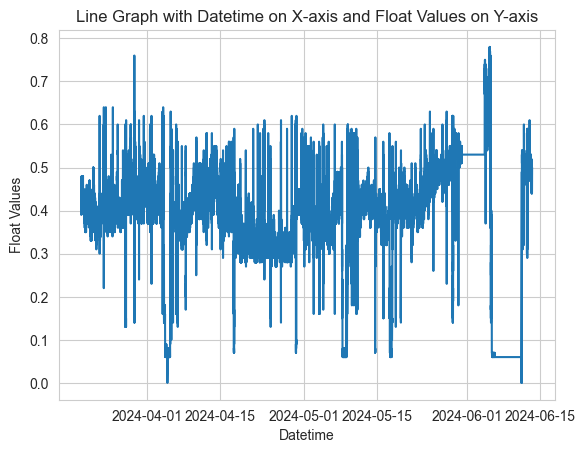

In [35]:
import seaborn as sns
sns.set_style("whitegrid")

# Plotting the graph
sns.lineplot(x='UPD_TIME', y='CF2_MNDE_V_VBT', data=new_df)
plt.xlabel('Datetime')
plt.ylabel('Float Values')
plt.title('Line Graph with Datetime on X-axis and Float Values on Y-axis')
plt.show()